<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/GameStatsGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.offsetbox as offsetbox
from PIL import Image

from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/play_by_play_2023.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-11-489584d10ce2>:12: DtypeWarning: Columns (179,180,182,183,205,206,213,214,218,219,220,253,254,255,260,262,263,266,267,268,269,283,284,332) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/play_by_play_2023.csv')


In [ ]:
image_paths = {
    'SF': '/content/drive/My Drive/NFL_Logos/49ers.png',
    'CHI': '/content/drive/My Drive/NFL_Logos/Bears.png',
    'CIN': '/content/drive/My Drive/NFL_Logos/Bengals.png',
    'BUF': '/content/drive/My Drive/NFL_Logos/Bills.png',
    'DEN': '/content/drive/My Drive/NFL_Logos/Broncos.png',
    'CLE': '/content/drive/My Drive/NFL_Logos/Browns.png',
    'TB': '/content/drive/My Drive/NFL_Logos/Buccaneers.png',
    'ARI': '/content/drive/My Drive/NFL_Logos/Cardinals.png',
    'LAC': '/content/drive/My Drive/NFL_Logos/Chargers.png',
    'KC': '/content/drive/My Drive/NFL_Logos/Chiefs.png',
    'IND': '/content/drive/My Drive/NFL_Logos/Colts.png',
    'WAS': '/content/drive/My Drive/NFL_Logos/Commanders.png',
    'DAL': '/content/drive/My Drive/NFL_Logos/Cowboys.png',
    'MIA': '/content/drive/My Drive/NFL_Logos/Dolphins.png',
    'PHI': '/content/drive/My Drive/NFL_Logos/Eagles.png',
    'ATL': '/content/drive/My Drive/NFL_Logos/Falcons.png',
    'NYG': '/content/drive/My Drive/NFL_Logos/Giants.png',
    'JAX': '/content/drive/My Drive/NFL_Logos/Jaguars.png',
    'NYJ': '/content/drive/My Drive/NFL_Logos/Jets.png',
    'DET': '/content/drive/My Drive/NFL_Logos/Lions.png',
    'GB': '/content/drive/My Drive/NFL_Logos/Packers.png',
    'CAR': '/content/drive/My Drive/NFL_Logos/Panthers.png',
    'NE': '/content/drive/My Drive/NFL_Logos/Patriots.png',
    'LV': '/content/drive/My Drive/NFL_Logos/Raiders.png',
    'LA': '/content/drive/My Drive/NFL_Logos/Rams.png',
    'BAL': '/content/drive/My Drive/NFL_Logos/Ravens.png',
    'NO': '/content/drive/My Drive/NFL_Logos/Saints.png',
    'SEA': '/content/drive/My Drive/NFL_Logos/Seahawks.png',
    'PIT': '/content/drive/My Drive/NFL_Logos/Steelers.png',
    'HOU': '/content/drive/My Drive/NFL_Logos/Texans.png',
    'TEN': '/content/drive/My Drive/NFL_Logos/Titans.png',
    'MIN': '/content/drive/My Drive/NFL_Logos/Vikings.png',
}

In [ ]:
df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-0.336103,NaN,NaN,NaN,NaN,NaN,0.515058,-51.505846
3,77,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,0.703308,0.340652,3.328642,1.0,0.996628,0.583928,0.661106,33.889407
4,102,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,0.469799,NaN,NaN,NaN,NaN,NaN,0.196065,-19.606467


In [ ]:
pen_team = df["penalty_team"]
df1 = pd.DataFrame(pen_team)

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.head()

,penalty_team
10,WAS
17,WAS
18,ARI
21,ARI
23,ARI


In [ ]:
team = pen_team.value_counts()

In [ ]:
pen = team.values
tm = team.index

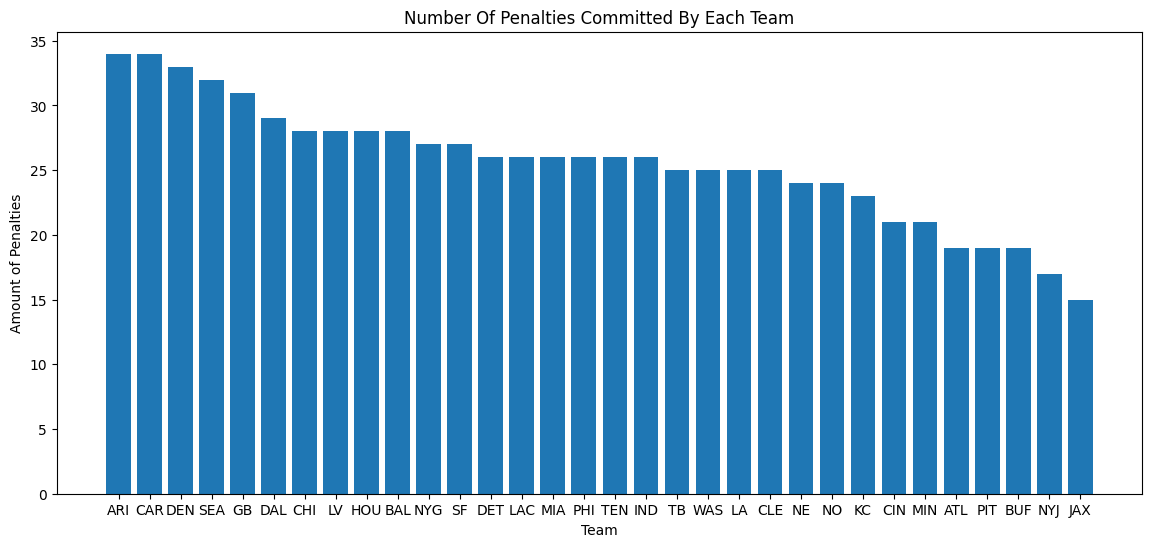

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(tm, pen, width = .8)

plt.xlabel('Team')
plt.ylabel('Amount of Penalties')
plt.title('Number Of Penalties Committed By Each Team')

plt.show()

In [ ]:
df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

In [ ]:
stacked_df = df3.pivot(index='penalty_team', columns='down', values='count').fillna(0)

In [ ]:
# Calculate the total count for each 'penalty_team'
team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# Sort the DataFrame by the total count in descending order
sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]

In [ ]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB0A051F760>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3DAC20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3D84C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3D8310>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3DAB90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C363CA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3B9E40>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3D8490>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3B9E70>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3D83D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3AB520>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=150x100 at 0x7EB09C3AB4C0>, <PIL.PngImagePl

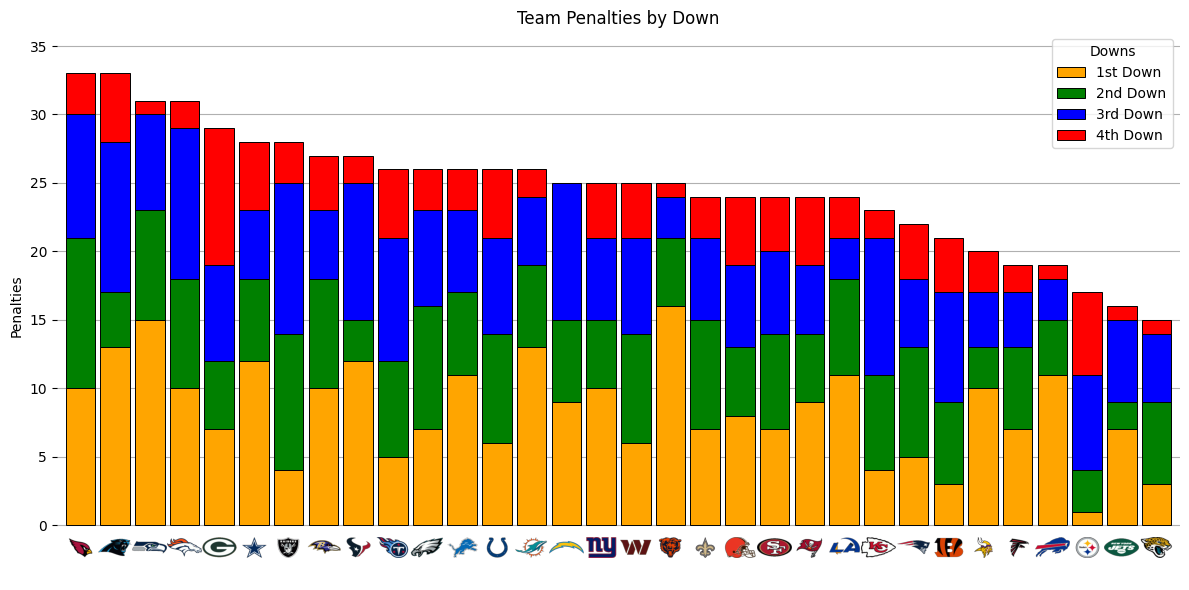

In [ ]:
colors = ['orange', 'green', 'blue', 'red']

ax = sorted_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.85, color=colors, edgecolor='black', linewidth=0.7, zorder=3)

# Add labels
plt.xlabel('Teams')
plt.ylabel('Penalties')
plt.title('Team Penalties by Down')

# Add images
for i, team_name in enumerate(sorted_df.index):
  img_path = image_paths.get(team_name)
  img = mpimg.imread(img_path)
  ax.imshow(img, extent=[i - 0.5, i + 0.5, -2.4, -0.9], aspect='auto', alpha=1, zorder=5)

# Add legend
legend_labels = ['1st Down', '2nd Down', '3rd Down', '4th Down ']
plt.legend(legend_labels, title = "Downs")

ax.set_ylim([-4, (team_totals).values.max() + 3])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(zorder=0)

# Show the graph
plt.tight_layout()
plt.show()

In [ ]:
down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

print(sorted_df.index)


Index(['ARI', 'CAR', 'SEA', 'DEN', 'GB', 'DAL', 'LV', 'BAL', 'HOU', 'TEN',
       'PHI', 'DET', 'IND', 'MIA', 'LAC', 'NYG', 'WAS', 'CHI', 'NO', 'CLE',
       'SF', 'TB', 'LA', 'KC', 'NE', 'CIN', 'MIN', 'ATL', 'BUF', 'PIT', 'NYJ',
       'JAX'],
      dtype='object', name='penalty_team')


In [ ]:
image_paths = {
    'SF': '/content/drive/My Drive/NFL_Logos/49ers.png',
    'CHI': '/content/drive/My Drive/NFL_Logos/Bears.png',
    'CIN': '/content/drive/My Drive/NFL_Logos/Bengals.png',
    'BUF': '/content/drive/My Drive/NFL_Logos/Bills.png',
    'DEN': '/content/drive/My Drive/NFL_Logos/Broncos.png',
    'CLE': '/content/drive/My Drive/NFL_Logos/Browns.png',
    'TB': '/content/drive/My Drive/NFL_Logos/Buccaneers.png',
    'ARI': '/content/drive/My Drive/NFL_Logos/Cardinals.png',
    'LAC': '/content/drive/My Drive/NFL_Logos/Chargers.png',
    'KC': '/content/drive/My Drive/NFL_Logos/Chiefs.png',
    'IND': '/content/drive/My Drive/NFL_Logos/Colts.png',
    'WAS': '/content/drive/My Drive/NFL_Logos/Commanders.png',
    'DAL': '/content/drive/My Drive/NFL_Logos/Cowboys.png',
    'MIA': '/content/drive/My Drive/NFL_Logos/Dolphins.png',
    'PHI': '/content/drive/My Drive/NFL_Logos/Eagles.png',
    'ATL': '/content/drive/My Drive/NFL_Logos/Falcons.png',
    'NYG': '/content/drive/My Drive/NFL_Logos/Giants.png',
    'JAX': '/content/drive/My Drive/NFL_Logos/Jaguars.png',
    'NYJ': '/content/drive/My Drive/NFL_Logos/Jets.png',
    'DET': '/content/drive/My Drive/NFL_Logos/Lions.png',
    'GB': '/content/drive/My Drive/NFL_Logos/Packers.png',
    'CAR': '/content/drive/My Drive/NFL_Logos/Panthers.png',
    'NE': '/content/drive/My Drive/NFL_Logos/Patriots.png',
    'LV': '/content/drive/My Drive/NFL_Logos/Raiders.png',
    'LA': '/content/drive/My Drive/NFL_Logos/Rams.png',
    'BAL': '/content/drive/My Drive/NFL_Logos/Ravens.png',
    'NO': '/content/drive/My Drive/NFL_Logos/Saints.png',
    'SEA': '/content/drive/My Drive/NFL_Logos/Seahawks.png',
    'PIT': '/content/drive/My Drive/NFL_Logos/Steelers.png',
    'HOU': '/content/drive/My Drive/NFL_Logos/Texans.png',
    'TEN': '/content/drive/My Drive/NFL_Logos/Titans.png',
    'MIN': '/content/drive/My Drive/NFL_Logos/Vikings.png',
}

df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

# Calculate the total count for each 'penalty_team'
team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# Sort the DataFrame by the total count in descending order
sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]

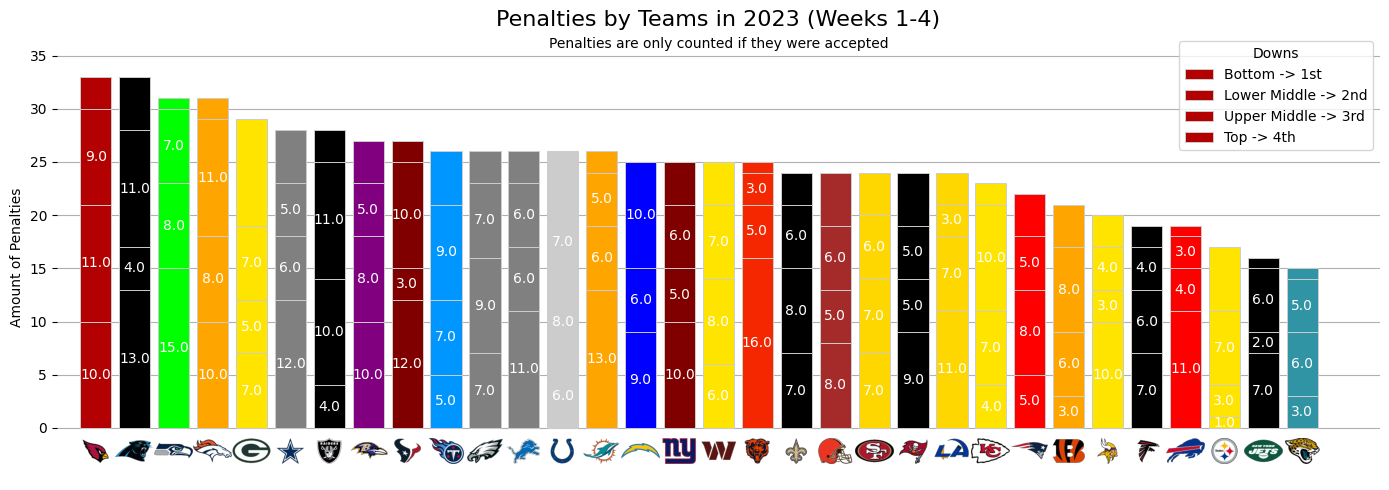

In [ ]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

colors1 = ['#B30000', 'black', '#00FF00', 'orange', '#FFE400', 'gray', 'black', 'purple', 'maroon', '#0096FF', 'gray', 'gray', '0.8', 'orange', 'blue', 'maroon', '#FFE400', '#F42700', 'black', 'brown', 'gold', 'black',
           'gold', '#FFE400', 'red', 'orange', '#FFE400', 'black', 'red', '#FFE400', 'black', '#3094A5']

fig, ax = plt.subplots(figsize = (14,5))

index = np.arange(len(sorted_df.index))

ax.bar(index, down1, color=colors1, edgecolor='0.8', linewidth=0.7, zorder = 4)
ax.bar(index, down2, bottom=down1, color=colors1,edgecolor='0.8', linewidth=0.7,zorder = 4)
ax.bar(index, down3, bottom=[d1 + d2 for d1, d2 in zip(down1, down2)], color=colors1, edgecolor='0.8', linewidth=0.7,zorder = 4)
ax.bar(index, down4, bottom=[d1 + d2 + d3 for d1, d2, d3 in zip(down1, down2, down3)], color=colors1, edgecolor='0.8', linewidth=0.7,zorder = 4)

for i in range(len(sorted_df.index)):
    team = sorted_df.index[i]

    # Calculate the total height of the bar for this team
    total_height = down1[i] + down2[i] + down3[i] + down4[i]

    # Add labels for each segment (1st, 2nd, 3rd, 4th down)
    ax.text(i, down1[i] / 2, str(down1[i]), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] / 2), str(down2[i]), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] + down3[i] / 2), str(down3[i]), ha='center', va='center', color='white', fontsize=10, zorder = 5)

for i in range(len(sorted_df.index)):
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.50, -3.4 ,-1], aspect='auto', zorder=3)


# Add labels
ax.set_ylabel('Amount of Penalties')
ax.set_title('Penalties by Teams in 2023 (Weeks 1-4)')

# Add a main title
ax.set_title('Penalties by Teams in 2023 (Weeks 1-4)', fontsize=16)

# Add a subtitle
subtitle = 'Penalties are only counted if they were accepted'
plt.text(0.5, 0.97, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

# Add legend
legend_labels = ['Bottom -> 1st', 'Lower Middle -> 2nd', 'Upper Middle -> 3rd', 'Top -> 4th']
leg = plt.legend(legend_labels, title = "Downs")

plt.ylim([-4.9, (team_totals).values.max() + 4])
plt.xlim([-1, 33])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(0, 32, 1))

ax.grid(zorder=0)
ax.xaxis.set_visible(False)


# Show the graph
plt.tight_layout()
plt.show()

In [ ]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11272 entries, 0 to 11271
Columns: 372 entries, play_id to pass_oe
dtypes: float64(190), int64(42), object(140)
memory usage: 32.0+ MB


In [ ]:
pass_df = df[df['play_type'] == "pass"]
pass_df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
3,77,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,0.703308,0.340652,3.328642,1.0,0.996628,0.583928,0.661106,33.889407
5,124,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-0.521544,0.234473,4.626063,3.0,0.999221,0.979605,0.495536,50.446376
6,147,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,1.173155,0.304367,4.480009,2.0,1.000000,0.997461,0.563005,43.699485
7,172,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-0.515452,1.168102,10.487875,9.0,0.472213,0.253578,0.484261,51.573908
8,197,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-0.872005,0.908345,4.576524,3.0,0.441858,0.276978,0.709240,29.076004


In [ ]:
filt = pass_df.groupby('posteam')['qb_epa'].sum()
plays = pass_df['posteam'].value_counts()

In [ ]:
plays = plays.sort_index()
plays.head()

ARI    130
ATL    135
BAL    116
BUF    143
CAR    176
Name: posteam, dtype: int64

In [ ]:
filt = filt.sort_index()
filt.head()

posteam
ARI     5.703160
ATL   -35.341264
BAL     7.598336
BUF    39.253158
CAR   -30.275435
Name: qb_epa, dtype: float64

In [ ]:
qb_epa_per_play = filt / plays
print(qb_epa_per_play)

posteam
ARI    0.043870
ATL   -0.261787
BAL    0.065503
BUF    0.274498
CAR   -0.172020
CHI   -0.189178
CIN   -0.211757
CLE   -0.270637
DAL    0.099714
DEN    0.154796
DET    0.147355
GB     0.048417
HOU    0.139217
IND    0.001895
JAX   -0.102799
KC     0.126327
LA     0.104701
LAC    0.197886
LV    -0.055076
MIA    0.451224
MIN    0.049983
NE    -0.124292
NO    -0.103018
NYG   -0.350539
NYJ   -0.265041
PHI    0.060822
PIT   -0.256194
SEA    0.066922
SF     0.412558
TB     0.174044
TEN   -0.114751
WAS   -0.151768
dtype: float64


In [ ]:
fin = df[df['desc'] == "END GAME"]
fin.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
174,4482,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,4037,2023_01_BUF_NYJ,2023091100,NYJ,BUF,REG,1,NYJ,home,BUF,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,4326,2023_01_CAR_ATL,2023091000,ATL,CAR,REG,1,ATL,home,CAR,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,4269,2023_01_CIN_CLE,2023091002,CLE,CIN,REG,1,CIN,away,CLE,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,4091,2023_01_DAL_NYG,2023091013,NYG,DAL,REG,1,NYG,home,DAL,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
home_pts = fin.groupby('home_team')['total_home_score'].sum()

away_pts = fin.groupby('away_team')['total_away_score'].sum()


total_pts = home_pts + away_pts
#total_pts.head()

tot_pt = total_pts.values
team = total_pts.index
#print(tot_pt)
#print(team)

total_pts.head()

home_team
ARI     88
ATL     62
BAL     99
BUF    139
CAR     67
dtype: int64

In [ ]:
coefficients = np.polyfit(qb_epa_per_play, tot_pt, 1)
print(coefficients[1])
print(coefficients[0])

89.25152717676241
114.94880985113522


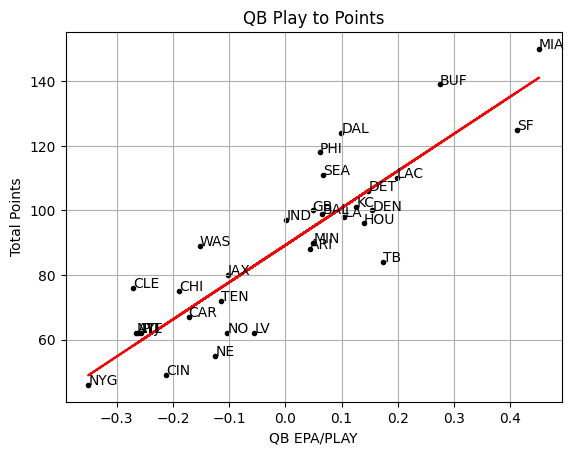

In [ ]:
plt.scatter(qb_epa_per_play, tot_pt, marker='.', color='black')

for i, team in enumerate(plays.index):
    plt.annotate(team, (qb_epa_per_play[i], tot_pt[i]))

trend_line = coefficients[0] * np.array(qb_epa_per_play) + coefficients[1]

plt.plot(qb_epa_per_play, trend_line, color='red', label='Trend Line')


plt.xlabel('QB EPA/PLAY')
plt.ylabel('Total Points')
plt.title('QB Play to Points')
plt.grid(True)

plt.show()

In [ ]:
logo_images = []
for team in plays.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

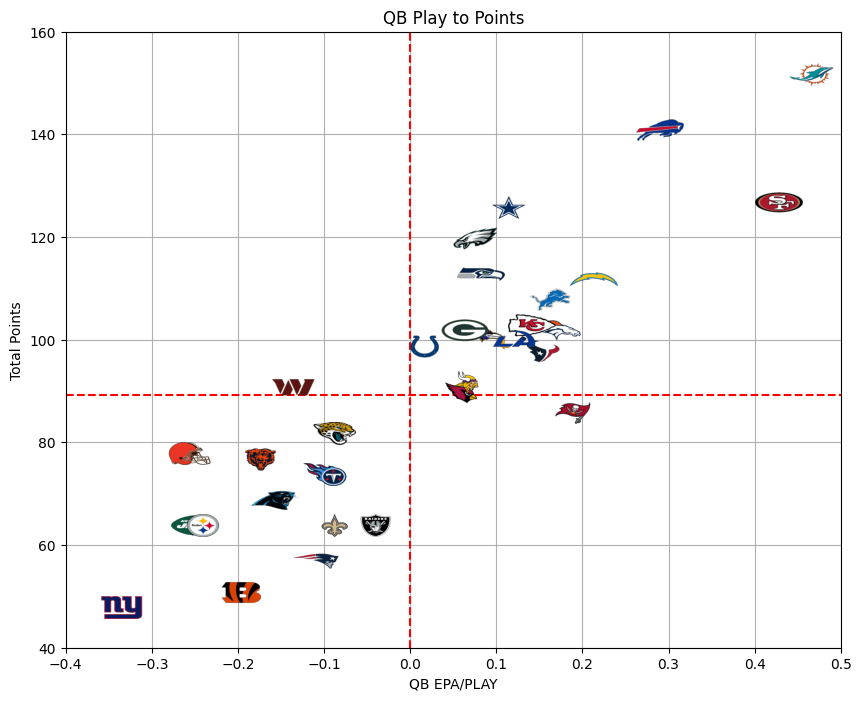

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Define the size for the images
mult = 0.5
image_width = 0.05 * mult
image_height = 2 * mult

# Scatter plot with markers replaced by logos
for i in range(len(qb_epa_per_play)):
    x, y, team = qb_epa_per_play[i], tot_pt[i], plays.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x - image_width / 2, x + 0.03 + image_width / 2, y - image_height / 2, y + 3.4 + image_height / 2], aspect='auto', zorder=3)

mean_x = np.mean(qb_epa_per_play)
mean_y = np.mean(tot_pt)

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.xlabel('QB EPA/PLAY')
plt.ylabel('Total Points')
plt.title('QB Play to Points in 2023 (Weeks 1-4)')
plt.grid(True)

plt.ylim(40,160)
plt.xlim(-0.4,0.5)

plt.show()